# a) NOT-operator:
Based on [linear-2d](https://gitlab.com/ntnu-tdat3025/regression/linear-2d) by Ole Christian Eidheim.

In [36]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import data from csv

In [37]:

x_train = torch.tensor([0,1]).reshape(-1, 1).float()

y_train = torch.tensor([1,0]).reshape(-1, 1).float()

## Define Linear Regression Model class

In [38]:
class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.tensor([[1.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return torch.sigmoid(x @ self.W + self.b)
        

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)

## Optimize with stochastic gradient descent (SGD)
PyTorch's built in optimizer does a lot of the work for us.

In [39]:
model = LinearRegressionModel()

# set constants
epoch_count = 10000
step_length = 0.1

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], step_length)

for epoch in range(epoch_count):
    
    model.loss(x_train, y_train).backward()  # Compute loss gradients

    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step


## Visualize data

W = tensor([[-6.4774]], requires_grad=True), b = tensor([[3.1307]], requires_grad=True), loss = tensor(0.0015, grad_fn=<MseLossBackward>)


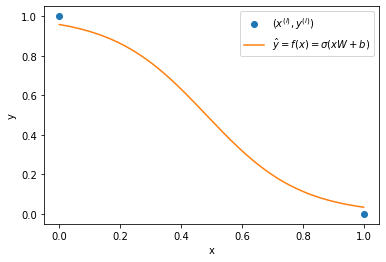

In [40]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# clear from previous
plt.figure().clear()

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')

plt.xlabel('x')
plt.ylabel('y')

x_points = np.linspace(torch.min(x_train).item(), torch.max(x_train).item(),1000)
x = torch.tensor(x_points).reshape(-1,1).float()

plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) =  \sigma(xW+b)$')
plt.legend()

plt.show()